In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score

### Iremos realizar um estudo dos salários de profissionais de dados, um modelo para prever isso é de extrema valia para empresas de tecnologia que desejam tomar decisões bem fundamentadas, melhorar a gestão financeira e estratégica, bem como garantir que a compensação seja justa e alinhada com as características individuais dos colaboradores. 

#### Nesse estudo abordaremos uma base de dados com dados de profissionais de dados, mas pode ser desenvolvido para demais profissionais dependendo da necessidade da empresa

In [2]:
df = pd.read_csv('ds_salaries.csv')

### dicionário de variáveis
##### work_year  (ano de emprego)
##### experience_level: O nível de experiência do funcionário (por exemplo, nível básico, nível médio, sênior).
##### Employment_type: O tipo de emprego (por exemplo, tempo integral, meio período, contrato).
##### job_title: O cargo ou cargo do funcionário na empresa.
##### salário: O valor do salário na moeda local.
##### salário_currency: a moeda na qual o salário é indicado.
##### salário_in_usd: O valor do salário equivalente em USD (dólares dos Estados Unidos).
##### Employee_residence: O local da residência do funcionário.
##### remote_ratio: A porcentagem de trabalho remoto permitida para o cargo.
##### company_location: A localização da empresa.
##### company_size: O tamanho da empresa (por exemplo, pequena, média, grande).

In [3]:
#lendo df
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [4]:
#contagem de valores únicos da variável job_title
df.job_title.value_counts()

Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                            

### Optaremos por enquadrar os jobs dentro de 4 jobs principais

### Pesquisa para enquadrar as categorias dentro de Data Scientist, Data Engineer, Data analyst e Machine Learning Engineer
##### Data Scientist: Research Scientist, Data Science Manager,Machine Learning Scientist,Principal Data Scientist,AI Scientist,Data Science Consultant,Applied Data Scientist,Applied Machine Learning Scientist,Lead Data Scientist,Data Science Engineer,Data Specialist,Staff Data Scientist,  

##### Data Engineer:Big Data Engineer, Big Data Engineer,Lead Data Engineer,Data Engineering Manager,Data Analytics Engineer,Computer Vision Software Engineer,Principal Data Engineer,ETL Developer,Director of Data Engineering,Cloud Data Engineer,Big Data Architect, 

##### Data Analyst: Data Analytics Manager,BI Data Analyst,Business Data Analyst,Lead Data Analyst,Principal Data Analyst,Product Data Analyst,Financial Data Analyst, Finance Data Analyst, Marketing Data Analyst, Data Analytics Lead 

##### Machine Learning Engineer:ML Engineer, Computer Vision Engineer,Machine Learning Developer,Machine Learning Infrastructure Engineer,Lead Machine Learning Engineer,NLP Engineer,Head of Machine Learning, 3D Computer Vision Researcher, Machine Learning Manager, 

##### remover: Data Architect,Data Science Manager, Data Architect,Director of Data Science,Head of Data,Head of Data Science,Analytics Engineer, 

In [5]:
#criando listas com seus respectivos jobs
data_scientist = ['Research Scientist', 'Data Science Manager','Machine Learning Scientist','Principal Data Scientist','AI Scientist,Data Science Consultant','Applied Data Scientist','Applied Machine Learning Scientist','Lead Data Scientist','Data Science Engineer','Data Specialist','Staff Data Scientist']
data_engineer = ['Big Data Engineer', 'Big Data Engineer','Lead Data Engineer','Data Engineering Manager','Data Analytics Engineer','Computer Vision Software Engineer','Principal Data Engineer','ETL Developer','Director of Data Engineering','Cloud Data Engineer','Big Data Architect']
data_analyst = ['Data Analytics Manager','BI Data Analyst','Business Data Analyst','Lead Data Analyst','Principal Data Analyst','Product Data Analyst','Financial Data Analyst', 'Finance Data Analyst', 'Marketing Data Analyst', 'Data Analytics Lead' ]
machine_learning = ['ML Engineer', 'Computer Vision Engineer','Machine Learning Developer','Machine Learning Infrastructure Engineer','Lead Machine Learning Engineer','NLP Engineer','Head of Machine Learning', '3D Computer Vision Researcher', 'Machine Learning Manager']

In [6]:
# Substituindo os valores da lista de empregos por "emprego1"
df.loc[df['job_title'].isin(data_scientist), 'job_title'] = 'Data Scientist'
df.loc[df['job_title'].isin(data_engineer), 'job_title'] = 'Data Engineer'
df.loc[df['job_title'].isin(data_analyst), 'job_title'] = 'Data Analyst'
df.loc[df['job_title'].isin(machine_learning), 'job_title'] = 'Machine Learning Engineer'

In [7]:
df.job_title.value_counts()

Data Scientist               203
Data Engineer                168
Data Analyst                 127
Machine Learning Engineer     64
Data Architect                11
Data Science Consultant        7
Director of Data Science       7
AI Scientist                   7
Head of Data                   5
Head of Data Science           4
Analytics Engineer             4
Name: job_title, dtype: int64

In [8]:
# Lista de empregos para seleção
lista_empregos_selecao = ['Data Scientist', 'Data Engineer', 'Data Analyst', 'Machine Learning Engineer']

# Selecionando as linhas onde a coluna_empregos está na lista de empregos de seleção
df = df[df['job_title'].isin(lista_empregos_selecao)]

In [9]:
#vareficando valores únicos de job_title
df.job_title.value_counts()

Data Scientist               203
Data Engineer                168
Data Analyst                 127
Machine Learning Engineer     64
Name: job_title, dtype: int64

In [10]:
#colunas do df
df.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

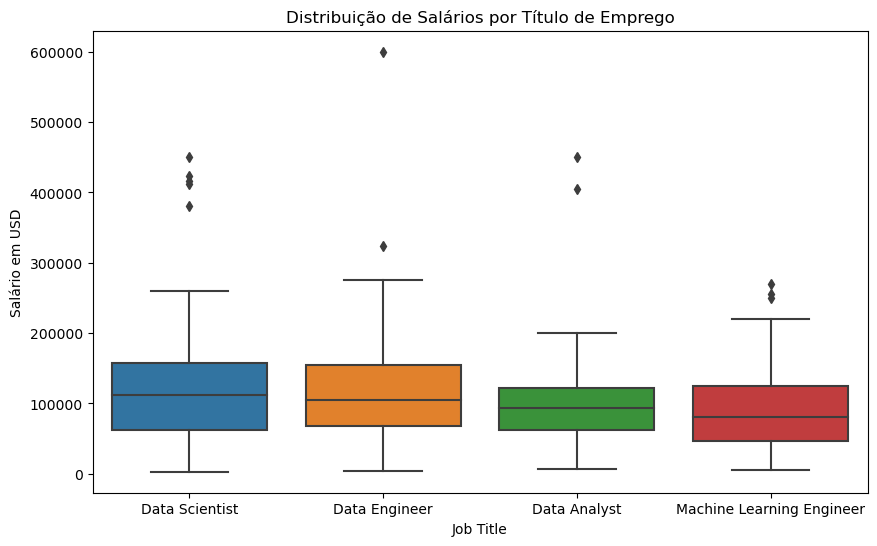

In [11]:
#verificando outliers no salary_in_usd por job_title

plt.figure(figsize=(10, 6)) 

sns.boxplot(x='job_title',y='salary_in_usd',data=df)

# Personalizando rótulos e título, se necessário
plt.xlabel('Job Title')
plt.ylabel('Salário em USD')
plt.title('Distribuição de Salários por Título de Emprego')

plt.show()  # Mostra o gráfico

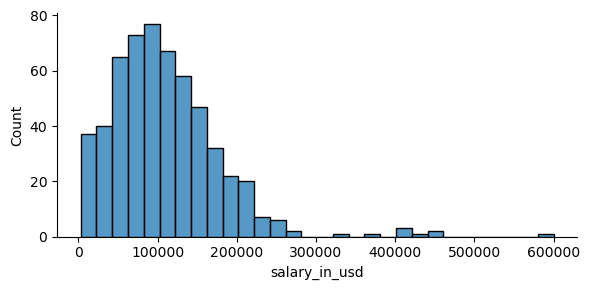

In [12]:
#verificando distribuição da variável resposta
sns.displot(data=df,x='salary_in_usd' , height=3, aspect=2);

In [13]:
df

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Data Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
601,601,2022,EN,FT,Data Analyst,52000,USD,52000,CA,0,CA,M
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M


In [14]:
df_ = df.drop(['Unnamed: 0','salary'], axis=1)

In [15]:
# Separar os dados em conjuntos de treino e teste / 7 é meu número da sorte
df_train, df_test = train_test_split(df_, test_size=0.3, random_state=7)

In [16]:
df_.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [17]:
reg = smf.ols('salary_in_usd ~ work_year+experience_level+employment_type+job_title+salary_currency+employee_residence+remote_ratio+company_location+company_size', data=df_train).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          salary_in_usd   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     6.128
Date:                Wed, 30 Aug 2023   Prob (F-statistic):           3.53e-32
Time:                        12:46:18   Log-Likelihood:                -4753.9
No. Observations:                 393   AIC:                             9676.
Df Residuals:                     309   BIC:                         1.001e+04
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                               1.688e+07   1.06e+07      1.589      0.113   -4.02e+06    3.78e+07
experience_level[T.EX]                  1.694e+05   2.21e+04      7.660      0.000    1.26e+05    2.13e+05
experience_level[T.MI]                  2.601e+04   9603.851      2.709      0.007    7116.539    4.49e+04
experience_level[T.SE]                  4.971e+04   9500.342      5.233      0.000     3.1e+04    6.84e+04
employment_type[T.FL]                   -1.33e+05   5.91e+04     -2.249      0.025   -2.49e+05   -1.67e+04
employment_type[T.FT]                  -1.191e+05   3.69e+04     -3.232      0.001   -1.92e+05   -4.66e+04
employment_type[T.PT]                  -1.415e+05   4.57e+04     -3.100      0.002   -2.31e+05   -5.17e+04
job_title[T.Data Engineer]              2.661e+04   8018.078      3.318      0.001    1.08e+04    4.24e+04
job_title[T.Data Scientist]             3.858e+04   7800.205      4.946      0.000    2.32e+04    5.39e+04
job_title[T.Machine Learning Engineer]  4.441e+04   1.07e+04      4.158      0.000    2.34e+04    6.54e+04
salary_currency[T.BRL]                  1.843e+05   1.03e+05      1.788      0.075   -1.85e+04    3.87e+05
salary_currency[T.CAD]                  8.407e+04   7.46e+04      1.126      0.261   -6.28e+04    2.31e+05
salary_currency[T.CHF]                   7.37e+04   5.33e+04      1.382      0.168   -3.12e+04    1.79e+05
salary_currency[T.CLP]                  2.504e+04   3.13e+04      0.800      0.424   -3.66e+04    8.66e+04
salary_currency[T.CNY]                  3.171e+04   3.13e+04      1.012      0.312   -2.99e+04    9.34e+04
salary_currency[T.DKK]                  6.675e+04   4.39e+04      1.520      0.130   -1.97e+04    1.53e+05
salary_currency[T.EUR]                  1.794e+05   8.57e+04      2.093      0.037    1.08e+04    3.48e+05
salary_currency[T.GBP]                  1.651e+05    1.2e+05      1.377      0.169   -7.07e+04    4.01e+05
salary_currency[T.HUF]                  5.381e+04   4.37e+04      1.232      0.219   -3.22e+04     1.4e+05
salary_currency[T.INR]                  1.252e+05   8.26e+04      1.515      0.131   -3.74e+04    2.88e+05
salary_currency[T.JPY]                  5.221e+04   8.45e+04      0.618      0.537   -1.14e+05    2.18e+05
salary_currency[T.PLN]                  5.169e+04   6.15e+04      0.841      0.401   -6.93e+04    1.73e+05
salary_currency[T.SGD]                  4.759e+04   3.15e+04      1.512      0.131   -1.43e+04     1.1e+05
salary_currency[T.TRY]                  2.134e+04   2.93e+04      0.728      0.467   -3.63e+04     7.9e+04
salary_currency[T.USD]                  1.387e+05   7.14e+04      1.943      0.053   -1771.114    2.79e+05
employee_residence[T.AR]                -2.95e+04   3.08e+04     -0.958      0.339   -9

C:\Users\felip\Anaconda3\lib\site-packages\numpy\linalg\linalg.py:2158: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)
C:\Users\felip\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:696: RuntimeWarning: invalid value encountered in sqrt
  return self.resid / sigma / np.sqrt(1 - hii)


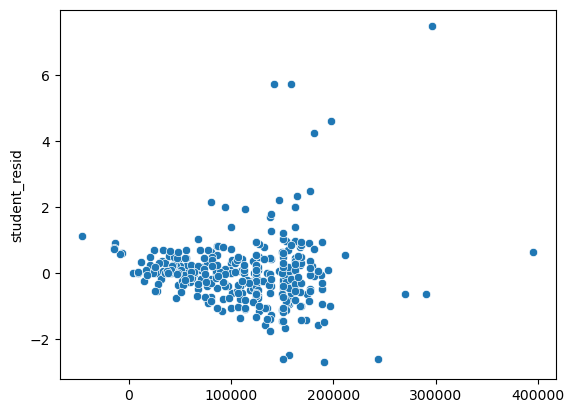

In [18]:
st_res = reg.outlier_test()
sns.scatterplot(x = reg.predict(), y = st_res.student_resid);

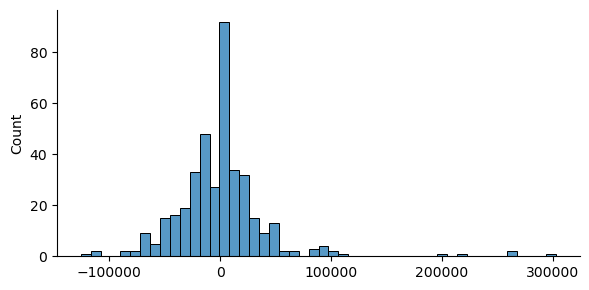

In [19]:
#verificando distribuição do resíduo
sns.displot(reg.resid, height=3, aspect=2);

In [20]:
reg2 = smf.ols('salary_in_usd ~ experience_level+employment_type+job_title+salary_currency+company_size', data=df_train).fit()
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          salary_in_usd   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     13.81
Date:                Wed, 30 Aug 2023   Prob (F-statistic):           4.80e-40
Time:                        12:46:20   Log-Likelihood:                -4810.7
No. Observations:                 393   AIC:                             9675.
Df Residuals:                     366   BIC:                             9783.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                               1.779e+05   6.69e+04      2.658      0.008    4.63e+04    3.09e+05
experience_level[T.EX]                  1.606e+05   2.18e+04      7.380      0.000    1.18e+05    2.03e+05
experience_level[T.MI]                  2.703e+04   8600.039      3.143      0.002    1.01e+04    4.39e+04
experience_level[T.SE]                  5.919e+04   8458.675      6.997      0.000    4.26e+04    7.58e+04
employment_type[T.FL]                  -2.316e+05   4.89e+04     -4.735      0.000   -3.28e+05   -1.35e+05
employment_type[T.FT]                  -1.491e+05   3.86e+04     -3.859      0.000   -2.25e+05   -7.31e+04
employment_type[T.PT]                  -1.569e+05   4.53e+04     -3.463      0.001   -2.46e+05   -6.78e+04
job_title[T.Data Engineer]              2.663e+04   7798.999      3.415      0.001    1.13e+04     4.2e+04
job_title[T.Data Scientist]             3.507e+04   7528.442      4.658      0.000    2.03e+04    4.99e+04
job_title[T.Machine Learning Engineer]  3.163e+04   9809.093      3.224      0.001    1.23e+04    5.09e+04
salary_currency[T.BRL]                 -4.948e+04   7.47e+04     -0.662      0.508   -1.96e+05    9.74e+04
salary_currency[T.CAD]                 -5376.9963   5.43e+04     -0.099      0.921   -1.12e+05    1.01e+05
salary_currency[T.CHF]                  3.148e+04    7.4e+04      0.426      0.671   -1.14e+05    1.77e+05
salary_currency[T.CLP]                 -5.082e+04    7.4e+04     -0.687      0.492   -1.96e+05    9.46e+04
salary_currency[T.CNY]                 -2.345e+04   7.37e+04     -0.318      0.750   -1.68e+05    1.21e+05
salary_currency[T.DKK]                  4496.5324    7.8e+04      0.058      0.954   -1.49e+05    1.58e+05
salary_currency[T.EUR]                  -1.01e+04    5.3e+04     -0.191      0.849   -1.14e+05    9.42e+04
salary_currency[T.GBP]                  1.471e+04   5.36e+04      0.275      0.784   -9.06e+04     1.2e+05
salary_currency[T.HUF]                 -3.733e+04   6.42e+04     -0.582      0.561   -1.64e+05    8.89e+04
salary_currency[T.INR]                 -4.353e+04   5.43e+04     -0.802      0.423    -1.5e+05    6.32e+04
salary_currency[T.JPY]                  1.265e+04   6.09e+04      0.208      0.835   -1.07e+05    1.32e+05
salary_currency[T.PLN]                 -5.002e+04   6.02e+04     -0.831      0.407   -1.68e+05    6.84e+04
salary_currency[T.SGD]                  6863.8998    7.4e+04      0.093      0.926   -1.39e+05    1.52e+05
salary_currency[T.TRY]                 -7.627e+04   6.43e+04     -1.185      0.237   -2.03e+05    5.02e+04
salary_currency[T.USD]                  5.218e+04    5.3e+04      0.985      0.325    -5.2e+04    1.56e+05
company_size[T.M]                      -2.064e+04   6026.367     -3.425      0.001   -3

In [21]:
df_.salary_currency.value_counts()

USD    366
EUR     86
GBP     44
INR     25
CAD     17
JPY      3
PLN      3
TRY      3
CNY      2
MXN      2
HUF      2
SGD      2
BRL      2
AUD      2
CLP      1
DKK      1
CHF      1
Name: salary_currency, dtype: int64

In [22]:
moedas_outros = ['USD', 'EUR']

# Substituir moedas que não são USD ou EUR por "Outros"
df_train['salary_currency'] = df_train['salary_currency'].apply(lambda x: x if x in moedas_outros else 'Outros')

# Substituir moedas que não são USD ou EUR por "Outros"
df_test['salary_currency'] = df_test['salary_currency'].apply(lambda x: x if x in moedas_outros else 'Outros')

In [23]:
df_train.salary_currency.value_counts()

USD       254
Outros     79
EUR        60
Name: salary_currency, dtype: int64

In [24]:
df_train['employment_type'] = df['employment_type'].apply(lambda x: x if x == "FT" else "Outros")
df_test['employment_type'] = df['employment_type'].apply(lambda x: x if x == "FT" else "Outros")

In [25]:
reg2 = smf.ols('salary_in_usd ~ experience_level+employment_type+job_title+salary_currency+company_size', data=df_train).fit()
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          salary_in_usd   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     26.49
Date:                Wed, 30 Aug 2023   Prob (F-statistic):           8.85e-41
Time:                        12:46:20   Log-Likelihood:                -4833.4
No. Observations:                 393   AIC:                             9691.
Df Residuals:                     381   BIC:                             9739.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                               1.347e+04   1.24e+04      1.089      0.277   -1.08e+04    3.78e+04
experience_level[T.EX]                    1.8e+05   2.17e+04      8.276      0.000    1.37e+05    2.23e+05
experience_level[T.MI]                  2.927e+04   8673.945      3.374      0.001    1.22e+04    4.63e+04
experience_level[T.SE]                  6.205e+04   8648.241      7.174      0.000     4.5e+04    7.91e+04
employment_type[T.Outros]              -3493.5805   1.69e+04     -0.207      0.836   -3.67e+04    2.97e+04
job_title[T.Data Engineer]              2.753e+04   8025.056      3.430      0.001    1.17e+04    4.33e+04
job_title[T.Data Scientist]             3.525e+04   7767.457      4.538      0.000       2e+04    5.05e+04
job_title[T.Machine Learning Engineer]  3.488e+04   9965.782      3.500      0.001    1.53e+04    5.45e+04
salary_currency[T.Outros]                766.3952   9291.295      0.082      0.934   -1.75e+04     1.9e+04
salary_currency[T.USD]                  6.248e+04   8297.920      7.530      0.000    4.62e+04    7.88e+04
company_size[T.M]                      -1.834e+04   6082.578     -3.016      0.003   -3.03e+04   -6384.738
company_size[T.S]                      -2.268e+04   9348.688     -2.427      0.016   -4.11e+04   -4303.339
==============================================================================
Omnibus:                      155.840   Durbin-Watson:                   1.898
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1060.846
Skew:                           1.523   Prob(JB):                    4.37e-231
Kurtosis:                      10.451   Cond. No.                         12.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

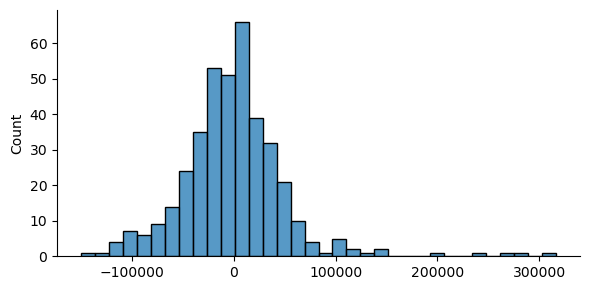

In [26]:
#verificando distribuição do resíduo
sns.displot(reg2.resid, height=3, aspect=2);

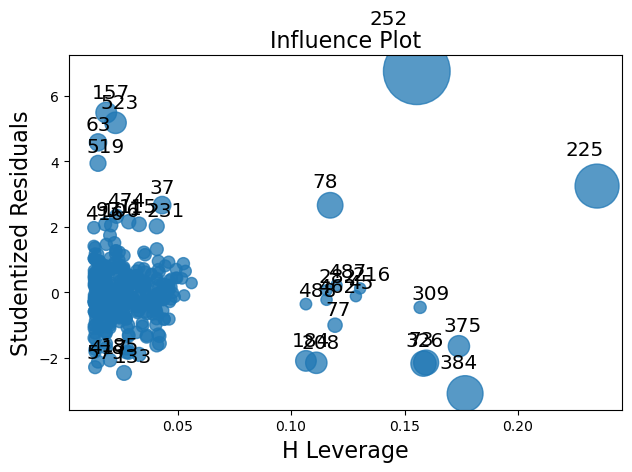

In [27]:
fig = sm.graphics.influence_plot(reg2, criterion="cooks")
fig.tight_layout(pad=1.0)

In [28]:
df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
work_year,393.0,2021.407125,0.682993,2020.0,2021.0,2022.0,2022.0,2022.0
salary_in_usd,393.0,110045.811705,70631.273876,4000.0,61300.0,100000.0,144000.0,600000.0
remote_ratio,393.0,70.356234,40.473919,0.0,50.0,100.0,100.0,100.0


In [29]:
df_train = df_train.drop([252,225,78])

In [30]:
reg2 = smf.ols('salary_in_usd ~ experience_level+employment_type+job_title+salary_currency+company_size', data=df_train).fit()
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          salary_in_usd   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                  0.411
Method:                 Least Squares   F-statistic:                     25.71
Date:                Wed, 30 Aug 2023   Prob (F-statistic):           1.16e-39
Time:                        12:46:21   Log-Likelihood:                -4760.0
No. Observations:                 390   AIC:                             9544.
Df Residuals:                     378   BIC:                             9592.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                1.79e+04   1.13e+04      1.585      0.114   -4302.101    4.01e+04
experience_level[T.EX]                   8.37e+04   2.31e+04      3.629      0.000    3.83e+04    1.29e+05
experience_level[T.MI]                  2.689e+04   7919.216      3.395      0.001    1.13e+04    4.25e+04
experience_level[T.SE]                  6.046e+04   7890.805      7.662      0.000    4.49e+04     7.6e+04
employment_type[T.Outros]              -3.568e+04   1.68e+04     -2.119      0.035   -6.88e+04   -2576.372
job_title[T.Data Engineer]              2.451e+04   7325.513      3.345      0.001    1.01e+04    3.89e+04
job_title[T.Data Scientist]             3.255e+04   7091.137      4.590      0.000    1.86e+04    4.65e+04
job_title[T.Machine Learning Engineer]  3.264e+04   9119.932      3.579      0.000    1.47e+04    5.06e+04
salary_currency[T.Outros]               2326.0945   8466.432      0.275      0.784   -1.43e+04     1.9e+04
salary_currency[T.USD]                   5.91e+04   7580.104      7.797      0.000    4.42e+04     7.4e+04
company_size[T.M]                      -1.529e+04   5564.299     -2.748      0.006   -2.62e+04   -4350.866
company_size[T.S]                       -2.18e+04   8601.621     -2.535      0.012   -3.87e+04   -4890.167
==============================================================================
Omnibus:                      146.287   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              944.925
Skew:                           1.440   Prob(JB):                    6.49e-206
Kurtosis:                      10.061   Cond. No.                         14.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

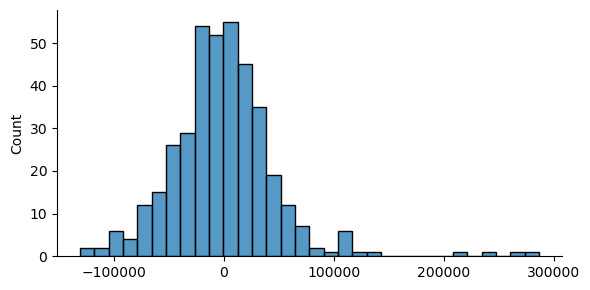

In [31]:
#verificando distribuição do resíduo
sns.displot(reg2.resid, height=3, aspect=2);

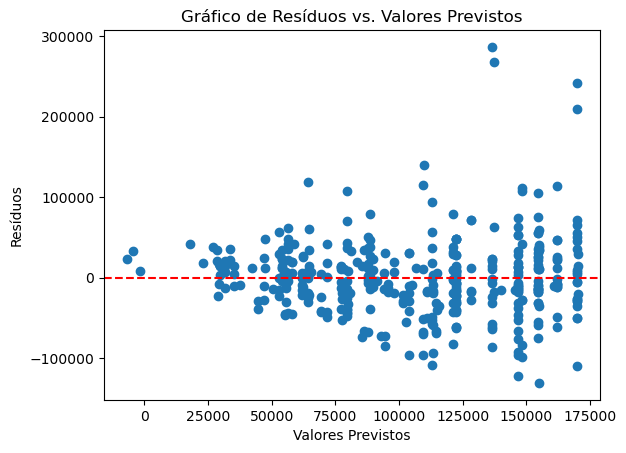

In [32]:
plt.scatter(reg2.fittedvalues, reg2.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Previstos')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos vs. Valores Previstos')
plt.show()

In [33]:
#r2 na base de treino
r2_train = reg2.rsquared
r2_train

0.4279429217904164

In [34]:
#predição na base de teste
pred_test = reg2.predict(df_test)

In [40]:
# Calcular o coeficiente de determinação R² na base de teste
r2_test = r2_score(df_test.salary_in_usd, pred_test)
r2_test


0.38908831572174973

In [41]:
residuos_test = df_test.salary_in_usd-pred_test

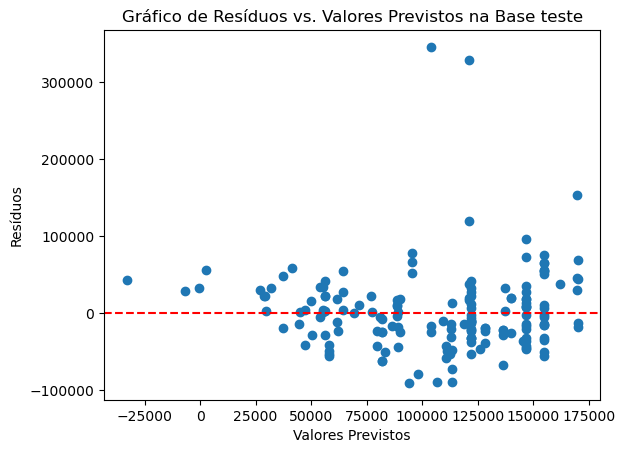

In [42]:
plt.scatter(pred_test, residuos_test)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Previstos')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos vs. Valores Previstos na Base teste')
plt.show()